In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
X_col=X.columns
X_col

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#C is 1/lambda
logreg = LogisticRegression(C=0.001,penalty='l2',max_iter=1000)
logreg.fit(X_train, y_train)    
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV

array([0.61290323, 0.69354839, 0.64516129, 0.77419355, 0.68852459,
       0.62295082, 0.6557377 , 0.70491803, 0.50819672, 0.60655738])

In [7]:
np.mean(scoreCV)

0.6512691697514542

In [8]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X_col,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                  Variables  Coefficients
0                 Intercept     -0.636081
1               Pregnancies      0.053840
2                   Glucose      0.113093
3             BloodPressure      0.005393
4             SkinThickness      0.008982
5                   Insulin      0.025153
6                       BMI      0.068163
7  DiabetesPedigreeFunction      0.050676
8                       Age      0.055087


In [9]:
logreg = LogisticRegression(C=0.01,penalty='l2',max_iter=1000)
logreg.fit(X_train, y_train)
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV
np.mean(scoreCV)
#score = logreg.score(X_test, y_test)
#print(score)

0.7571390798519302

In [10]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X_col,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                  Variables  Coefficients
0                 Intercept     -0.727945
1               Pregnancies      0.212907
2                   Glucose      0.505725
3             BloodPressure     -0.065237
4             SkinThickness     -0.011181
5                   Insulin      0.046629
6                       BMI      0.313441
7  DiabetesPedigreeFunction      0.206469
8                       Age      0.170210


In [13]:
logreg = LogisticRegression(C=10,penalty='l2',max_iter=1000)
logreg.fit(X_train, y_train)    
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV
np.mean(scoreCV)

0.7816763617133792

In [14]:
logreg = LogisticRegression(C=100,penalty='l2',max_iter=1000)
logreg.fit(X_train, y_train)    
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV
np.mean(scoreCV)

0.7816763617133792

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
C_param_range = [0.001,0.01,0.1,1,10,100,1000,10000]
scoresCV = []
for c in C_param_range:
    logreg = LogisticRegression(C=c,penalty='l2',max_iter=1000)
    logreg.fit(X_train, y_train)    
    scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([c,np.mean(scoreCV)])


In [16]:
df = pd.DataFrame(scoresCV,columns=['C (1/lambda)','Validation Accuracy'])
df

,C (1/lambda),Validation Accuracy
0,0.001,0.651269
1,0.010,0.757139
2,0.100,0.776811
3,1.000,0.783316
4,10.000,0.781676
5,100.000,0.781676
6,1000.000,0.781676
7,10000.000,0.781676


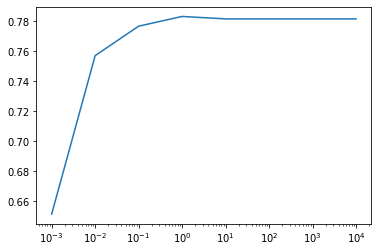

In [17]:
ax = plt.gca()
ax.plot(df['C (1/lambda)'].values,df['Validation Accuracy'].values)
ax.set_xscale('log')

In [18]:
logreg = LogisticRegression(C=1,penalty='l2',max_iter=1000)
logreg.fit(X_train, y_train)
score = logreg.score(X_test, y_test)
print(score)

0.7857142857142857


In [19]:
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X_col,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                  Variables  Coefficients
0                 Intercept     -0.907390
1               Pregnancies      0.448216
2                   Glucose      1.084132
3             BloodPressure     -0.315887
4             SkinThickness     -0.075733
5                   Insulin     -0.065410
6                       BMI      0.748659
7  DiabetesPedigreeFunction      0.410137
8                       Age      0.170757


In [20]:
logreg = LogisticRegression(C=0.001,penalty='l1',max_iter=1000,solver='liblinear')
logreg.fit(X_train, y_train)
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV
np.mean(scoreCV)

0.6512691697514542

In [21]:
#Several variables are set to zero
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X_col,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                  Variables  Coefficients
0                 Intercept           0.0
1               Pregnancies           0.0
2                   Glucose           0.0
3             BloodPressure           0.0
4             SkinThickness           0.0
5                   Insulin           0.0
6                       BMI           0.0
7  DiabetesPedigreeFunction           0.0
8                       Age           0.0


In [22]:
logreg = LogisticRegression(C=0.01,penalty='l1',max_iter=1000,solver='liblinear')
logreg.fit(X_train, y_train)
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV
print(np.mean(scoreCV))
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X_col,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

0.7101269169751455
                  Variables  Coefficients
0                 Intercept      0.000000
1               Pregnancies      0.000000
2                   Glucose      0.229928
3             BloodPressure      0.000000
4             SkinThickness      0.000000
5                   Insulin      0.000000
6                       BMI      0.000000
7  DiabetesPedigreeFunction      0.000000
8                       Age      0.000000


In [23]:
logreg = LogisticRegression(C=1,penalty='l1',max_iter=1000,solver='liblinear')
logreg.fit(X_train, y_train)
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV
print(np.mean(scoreCV))
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X_col,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

0.7833157059756742
                  Variables  Coefficients
0                 Intercept     -0.892866
1               Pregnancies      0.443694
2                   Glucose      1.080110
3             BloodPressure     -0.302911
4             SkinThickness     -0.067880
5                   Insulin     -0.058732
6                       BMI      0.732284
7  DiabetesPedigreeFunction      0.400055
8                       Age      0.160586


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
C_param_range = [0.001,0.01,0.1,1,10,100,1000,10000]
scoresCV = []
for c in C_param_range:
    logreg = LogisticRegression(C=c,penalty='l1',max_iter=1000,solver='liblinear')
    logreg.fit(X_train, y_train)    
    scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([c,np.mean(scoreCV)])


In [25]:
df = pd.DataFrame(scoresCV,columns=['C (1/lambda)','Validation Accuracy'])
df

,C (1/lambda),Validation Accuracy
0,0.001,0.651269
1,0.010,0.710127
2,0.100,0.771946
3,1.000,0.783316
4,10.000,0.781676
5,100.000,0.781676
6,1000.000,0.781676
7,10000.000,0.781676


In [ ]:
ax = plt.gca()
ax.plot(df['C (1/lambda)'].values,df['Validation Accuracy'].values)
ax.set_xscale('log')

In [26]:
logreg = LogisticRegression(C=1,penalty='l1',max_iter=1000,solver='liblinear')
logreg.fit(X_train, y_train)
score = logreg.score(X_test, y_test)
print(score)
Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X_col,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

0.7857142857142857
                  Variables  Coefficients
0                 Intercept     -0.892872
1               Pregnancies      0.443775
2                   Glucose      1.080166
3             BloodPressure     -0.302923
4             SkinThickness     -0.067828
5                   Insulin     -0.058823
6                       BMI      0.732240
7  DiabetesPedigreeFunction      0.400051
8                       Age      0.160485
